In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')

# EDA & Preprocessing

In [27]:
for col in train.columns:
    print(train[col].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8171
0
0
0


In [31]:
train.columns[-4]

'occyp_type'

## gender

In [5]:
def bar_chart(feature):
    credit2 = train[train['credit'] == 2][feature].value_counts()
    credit1 = train[train['credit'] == 1][feature].value_counts()
    credit0 = train[train['credit'] == 0][feature].value_counts()
    df = pd.DataFrame([credit2, credit1, credit0])
    df.index = ['credit2', 'credit1', 'credit0']
    df.plot(kind='bar', stacked= False, figsize=(10,5))
    plt.xticks(rotation=0)
    plt.show()

In [6]:
def bar_chart_T(feature):
    credit2 = train[train['credit'] == 2][feature].value_counts()
    credit1 = train[train['credit'] == 1][feature].value_counts()
    credit0 = train[train['credit'] == 0][feature].value_counts()
    df = pd.DataFrame([credit2, credit1, credit0])
    df.index = ['credit2', 'credit1', 'credit0']
    df.T.plot(kind='bar', stacked= False, figsize=(10,5))
    plt.xticks(rotation=0)
    plt.show()

In [7]:
def ratio_by_feature(feature):
    for i in train[feature].unique():
        print('------ {i} ------'.format(i=i))
        print(train[train[feature]==i]['credit'].value_counts() / sum(train[feature]== i))

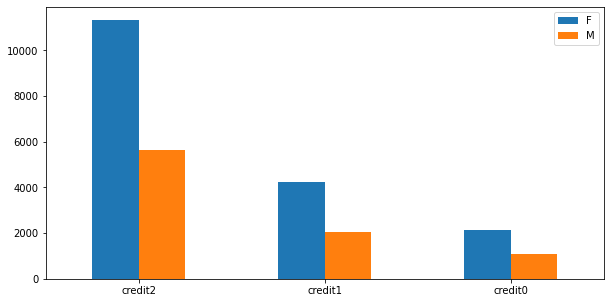

In [8]:
bar_chart('gender')

In [9]:
ratio_by_feature('gender')

------ F ------
2.0    0.640165
1.0    0.238458
0.0    0.121377
Name: credit, dtype: float64
------ M ------
2.0    0.643721
1.0    0.233676
0.0    0.122603
Name: credit, dtype: float64


## car

In [11]:
train.car.isna().sum()

0

In [9]:
train.car.value_counts()

N    16410
Y    10047
Name: car, dtype: int64

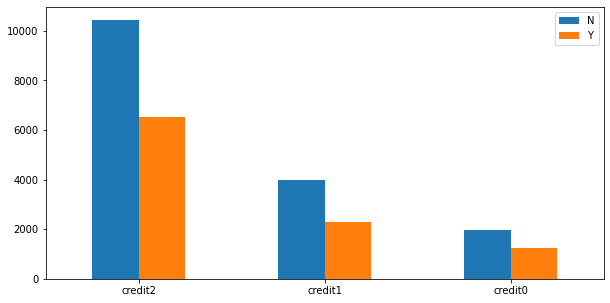

In [10]:
bar_chart('car')

In [11]:
ratio_by_feature('car')

------ N ------
2.0    0.636076
1.0    0.243144
0.0    0.120780
Name: credit, dtype: float64
------ Y ------
2.0    0.649945
1.0    0.226635
0.0    0.123420
Name: credit, dtype: float64


## reality

In [15]:
train.reality.isna().sum()

0

In [12]:
train.reality.value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

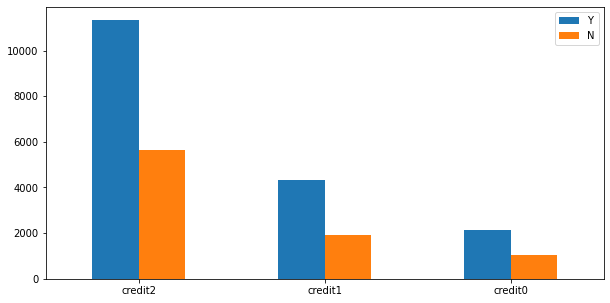

In [12]:
bar_chart('reality')

In [13]:
ratio_by_feature('reality')

------ N ------
2.0    0.652370
1.0    0.224296
0.0    0.123334
Name: credit, dtype: float64
------ Y ------
2.0    0.636007
1.0    0.242961
0.0    0.121032
Name: credit, dtype: float64


## child_num

In [18]:
train.child_num.isna().sum()

0

In [15]:
train.child_num.value_counts()



0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [16]:
ratio_by_feature('child_num')

------ 0 ------
2.0    0.642585
1.0    0.235660
0.0    0.121756
Name: credit, dtype: float64
------ 1 ------
2.0    0.629595
1.0    0.243780
0.0    0.126625
Name: credit, dtype: float64
------ 2 ------
2.0    0.660034
1.0    0.226503
0.0    0.113463
Name: credit, dtype: float64
------ 3 ------
2.0    0.647059
1.0    0.258170
0.0    0.094771
Name: credit, dtype: float64
------ 4 ------
2.0    0.574468
1.0    0.255319
0.0    0.170213
Name: credit, dtype: float64
------ 5 ------
1.0    0.6
2.0    0.2
0.0    0.2
Name: credit, dtype: float64
------ 14 ------
2.0    1.0
Name: credit, dtype: float64
------ 19 ------
2.0    1.0
Name: credit, dtype: float64
------ 7 ------
2.0    1.0
Name: credit, dtype: float64


- `child_num` $\geq 7 \to $ **drop** 

In [19]:
train = train[train['child_num'] < 6]
train.child_num.value_counts()

0    18340
1     5386
2     2362
3      306
4       47
5       10
Name: child_num, dtype: int64

## income_total

In [20]:
train.income_total.isna().sum()

0

In [22]:
train.income_total

0        202500.0
1        247500.0
2        450000.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: income_total, Length: 26451, dtype: float64

<AxesSubplot:>

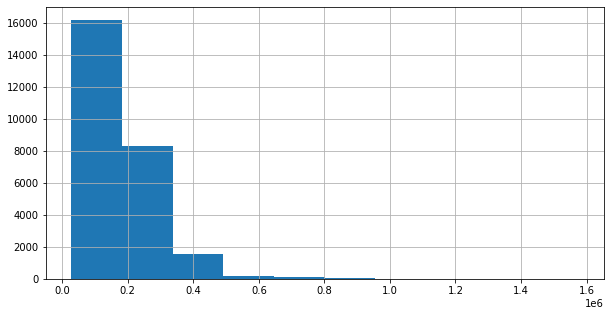

In [18]:
train.income_total.hist(figsize=(10,5))

## income_type

In [22]:
train.income_type.value_counts()

Working                 13639
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

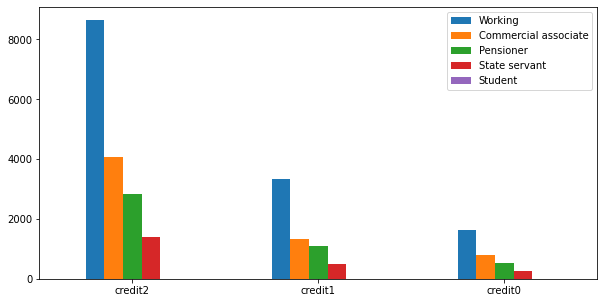

In [23]:
bar_chart('income_type')

In [24]:
ratio_by_feature('income_type')

------ Commercial associate ------
2.0    0.657207
1.0    0.216704
0.0    0.126088
Name: credit, dtype: float64
------ Working ------
2.0    0.634431
1.0    0.245399
0.0    0.120170
Name: credit, dtype: float64
------ State servant ------
2.0    0.649954
1.0    0.227019
0.0    0.123027
Name: credit, dtype: float64
------ Pensioner ------
2.0    0.635873
1.0    0.243650
0.0    0.120477
Name: credit, dtype: float64
------ Student ------
2.0    0.571429
1.0    0.428571
Name: credit, dtype: float64


## edu_type

In [25]:
train.edu_type.value_counts()

Secondary / secondary special    17989
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

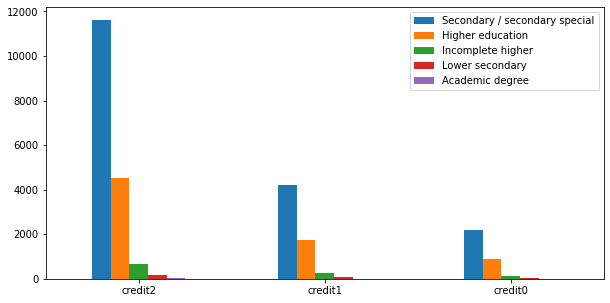

In [26]:
bar_chart('edu_type')

In [27]:
ratio_by_feature('edu_type')

------ Higher education ------
2.0    0.628595
1.0    0.244485
0.0    0.126920
Name: credit, dtype: float64
------ Secondary / secondary special ------
2.0    0.645728
1.0    0.233698
0.0    0.120574
Name: credit, dtype: float64
------ Incomplete higher ------
2.0    0.647059
1.0    0.241176
0.0    0.111765
Name: credit, dtype: float64
------ Lower secondary ------
2.0    0.661479
1.0    0.229572
0.0    0.108949
Name: credit, dtype: float64
------ Academic degree ------
2.0    0.608696
1.0    0.304348
0.0    0.086957
Name: credit, dtype: float64


## family_type

In [28]:
train.family_type.value_counts()

Married                 18194
Single / not married     3495
Civil marriage           2123
Separated                1536
Widow                    1103
Name: family_type, dtype: int64

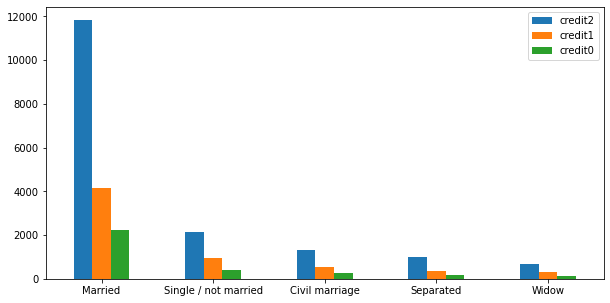

In [29]:
bar_chart_T('family_type')

In [30]:
ratio_by_feature('family_type')

------ Married ------
2.0    0.650819
1.0    0.227548
0.0    0.121634
Name: credit, dtype: float64
------ Civil marriage ------
2.0    0.610457
1.0    0.253886
0.0    0.135657
Name: credit, dtype: float64
------ Separated ------
2.0    0.647135
1.0    0.227214
0.0    0.125651
Name: credit, dtype: float64
------ Single / not married ------
2.0    0.616023
1.0    0.268956
0.0    0.115021
Name: credit, dtype: float64
------ Widow ------
2.0    0.614687
1.0    0.271079
0.0    0.114234
Name: credit, dtype: float64


## house_type

In [31]:
train.house_type.value_counts()

House / apartment      23647
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

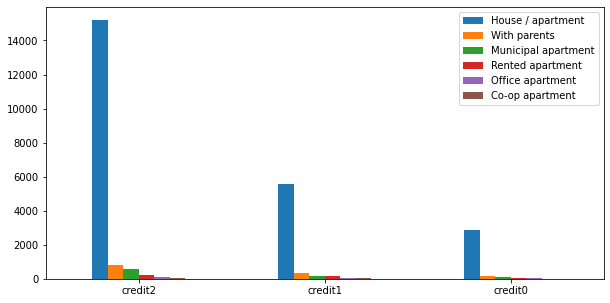

In [32]:
bar_chart('house_type')

In [33]:
ratio_by_feature('house_type')

------ Municipal apartment ------
2.0    0.669927
1.0    0.195599
0.0    0.134474
Name: credit, dtype: float64
------ House / apartment ------
2.0    0.642999
1.0    0.235506
0.0    0.121495
Name: credit, dtype: float64
------ With parents ------
2.0    0.630867
1.0    0.249006
0.0    0.120127
Name: credit, dtype: float64
------ Co-op apartment ------
2.0    0.600000
1.0    0.272727
0.0    0.127273
Name: credit, dtype: float64
------ Rented apartment ------
2.0    0.540793
1.0    0.342657
0.0    0.116550
Name: credit, dtype: float64
------ Office apartment ------
2.0    0.621053
1.0    0.252632
0.0    0.126316
Name: credit, dtype: float64


## DAYS_BIRTH

<AxesSubplot:>

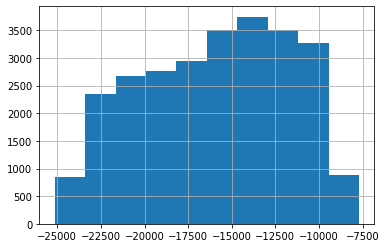

In [38]:
train.DAYS_BIRTH.hist()

## DAYS_EMPLOYED

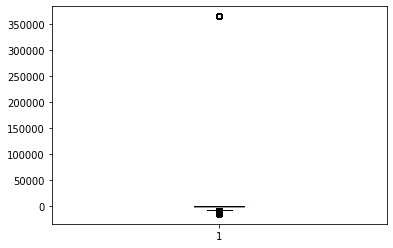

In [46]:
plt.boxplot(train.DAYS_EMPLOYED)
plt.show()

<AxesSubplot:>

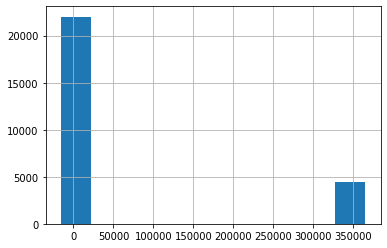

In [63]:
train.DAYS_EMPLOYED.hist()

- 백수는 양수

## FLAG_MOBIL

In [80]:
train.FLAG_MOBIL.value_counts()

1    26451
Name: FLAG_MOBIL, dtype: int64

In [81]:
test.FLAG_MOBIL.value_counts()

1    10000
Name: FLAG_MOBIL, dtype: int64

- 모든 데이터에서 동일한 값이므로 해당 피쳐는 드랍한다.

In [83]:
train = train.drop('FLAG_MOBIL', axis = 1)

## work_phone

In [85]:
train.work_phone.value_counts()

0    20508
1     5943
Name: work_phone, dtype: int64

In [90]:
ratio_by_feature('work_phone')

------ 0 ------
2.0    0.642237
1.0    0.236201
0.0    0.121562
Name: credit, dtype: float64
------ 1 ------
2.0    0.637893
1.0    0.239441
0.0    0.122665
Name: credit, dtype: float64


## phone

In [92]:
train.phone.value_counts()

0    18669
1     7782
Name: phone, dtype: int64

In [93]:
ratio_by_feature('phone')

------ 0 ------
2.0    0.638170
1.0    0.241577
0.0    0.120253
Name: credit, dtype: float64
------ 1 ------
2.0    0.648676
1.0    0.225777
0.0    0.125546
Name: credit, dtype: float64


## email

In [95]:
train.email.value_counts()

0    24036
1     2415
Name: email, dtype: int64

## occyp_type

In [100]:
train.occyp_type.isna().sum()

8171

In [97]:
train.occyp_type.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1572
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            401
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      123
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [33]:
train.occyp_type.fillna('None')

0                  None
1              Laborers
2              Managers
3           Sales staff
4              Managers
              ...      
26452        Core staff
26453              None
26454        Core staff
26455          Laborers
26456    Security staff
Name: occyp_type, Length: 26451, dtype: object

- **NA $\to$ 백수?**

- **NA $\to$ None**

## family_size

In [42]:
train.family_size.value_counts()

2.0    14106
1.0     5109
3.0     4632
4.0     2260
5.0      291
6.0       44
7.0        9
Name: family_size, dtype: int64

## begin_month

In [45]:
train.begin_month

0        -6.0
1        -5.0
2       -22.0
3       -37.0
4       -26.0
         ... 
26452    -2.0
26453   -47.0
26454   -25.0
26455   -59.0
26456    -9.0
Name: begin_month, Length: 26451, dtype: float64

<AxesSubplot:>

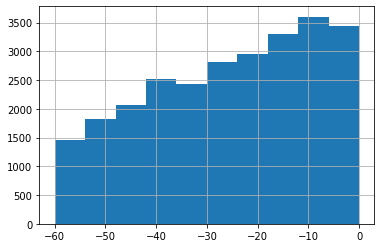

In [44]:
train.begin_month.hist()

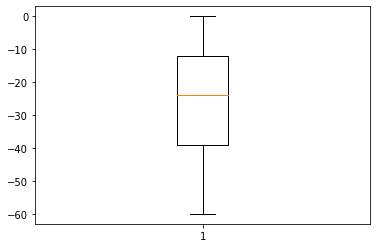

In [50]:
plt.boxplot(train.begin_month)
plt.show()

## credit

In [53]:
train.credit.value_counts()

2.0    16962
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [47]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')